*Final project for Quantitative Macroeconomic Theory at Washington University in St. Louis*
# Does the Type of Mortgage Rate Matter? Adjustable Rate and Fixed Rate
## Kam, Yu Fai (Geoffrey); Nemoto, Hiroyuki; and Tanaka, Masaki


## Step 0. Load modules and set parameters

### (A) Load modules

In [2]:
%matplotlib inline
from KNTModel import *
from KNTModel.tools import AR1_process
import numpy as np

### (B) Set parameters
#### parameters for the income ($z$) process


In [3]:
N_z     = 10    # number of grid points
rho_z   = 0.9   # AR1 coefficient
sig_z   = 0.008 # size of exogenous shock
Omega_z = 3     # range of grid

#### parameters for the aggregate factor ($x$) process

In [4]:
N_x     = 5 # number of grid points
rho_x   = 0.8 # AR1 coefficient
sig_x   = 0.5 # size of exogenous shock
Omega_x = 3 # range of grid

## Step 1. Discretize the exogenous processes
### (A) Discretize the income ($z$) process

In [5]:
# Generate the instance for the income process
lnz_process = AR1_process(rho = rho_z,
                          sig = sig_z,
                          varname = 'lnz')
# Discretize by Tauchen's method
lnz_process.discretize(method = 'Tauchen',
                       N = N_z,
                       Omega = Omega_z,
                       is_write_out_result = False)
# Get the grid and the transition probabilities
z_grid = np.exp(lnz_process.lnz_grid) + 1.
trans_prob_z = lnz_process.trans_mat

Discretizing the AR(1) process by Tauchen method...
Discretization done.


In [6]:
print(z_grid)

[1.94642857 1.95807974 1.96987434 1.98181414 1.99390092 2.0061365
 2.01852271 2.03106141 2.04375446 2.05660377]


### (B) Discretize the aggregate factor ($x$) process

In [7]:
# Generate the instance for the aggregate factor process
lnx_process = AR1_process(rho = rho_x,
                          sig = sig_x,
                          varname = 'lnx')
# Discretize by Tauchen's method
lnx_process.discretize(method = 'Tauchen',
                       N = N_x,
                       Omega = Omega_x,
                       is_write_out_result = False)
# Get the grid and the transition probabilities
x_grid = np.exp(lnx_process.lnx_grid)
trans_prob_x = lnx_process.trans_mat

Discretizing the AR(1) process by Tauchen method...
Discretization done.


In [8]:
print(x_grid)

## Step 2. Solve the adjustable-rate model

In [9]:
# Generate the instance for the adjustable-rate economy
ARM_Economy = ARM_FixedHousePrice(z_grid = z_grid,
                                  x_grid = x_grid,
                                  trans_prob_z = trans_prob_z,
                                  trans_prob_x = trans_prob_x,)

In [10]:
# Run the value iteration (it may take a few mins depending on # of grid points)
ARM_Economy.value_func_iter()

Starting the value function iteration...
elapsed time = 0:00:38.843842



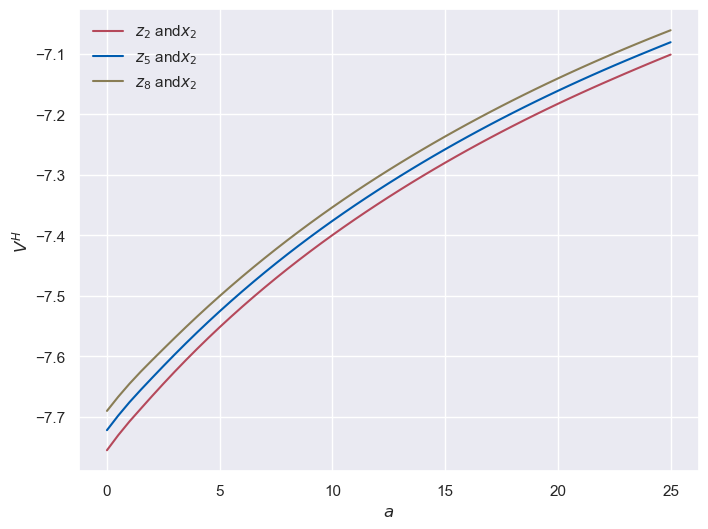

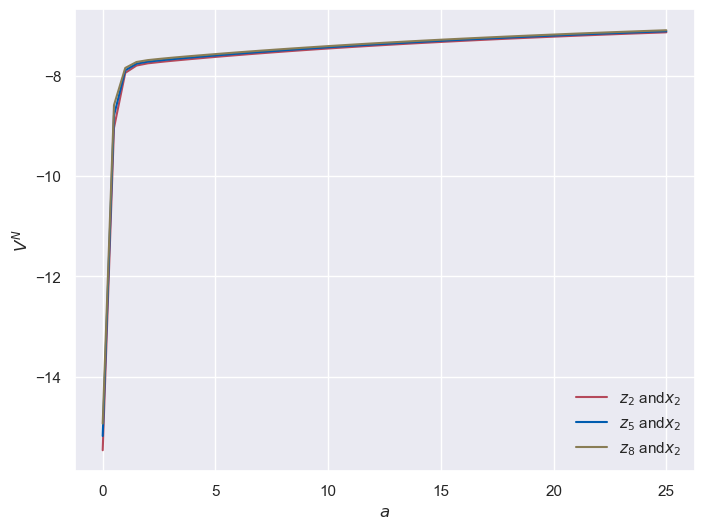

In [11]:
# Plot value function with respect to a
ARM_Economy.plot_value_func(homeownership = 'H',
                            axis = 0,
                            fixed_states =[(2, 2), (5, 2), (8, 2)],
                            fname ='ARM_value_fun_H_wrt_a.png')
ARM_Economy.plot_value_func(homeownership = 'N',
                            axis = 0,
                            fixed_states =[(2, 2), (5, 2), (8, 2)],
                            fname ='ARM_value_func_N_wrt_a.png')

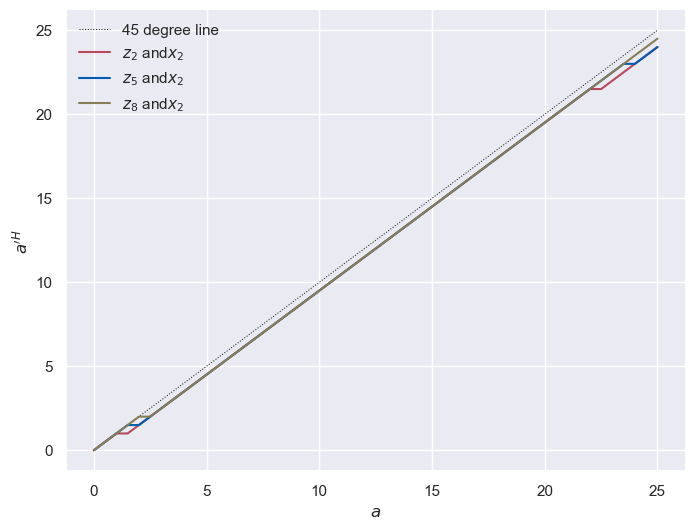

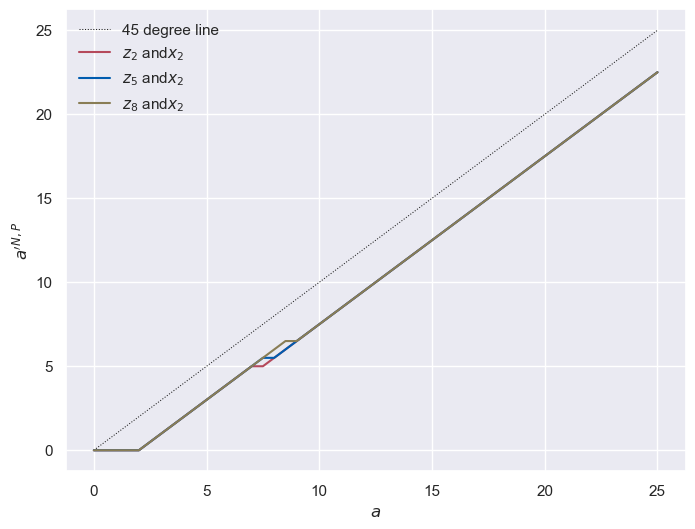

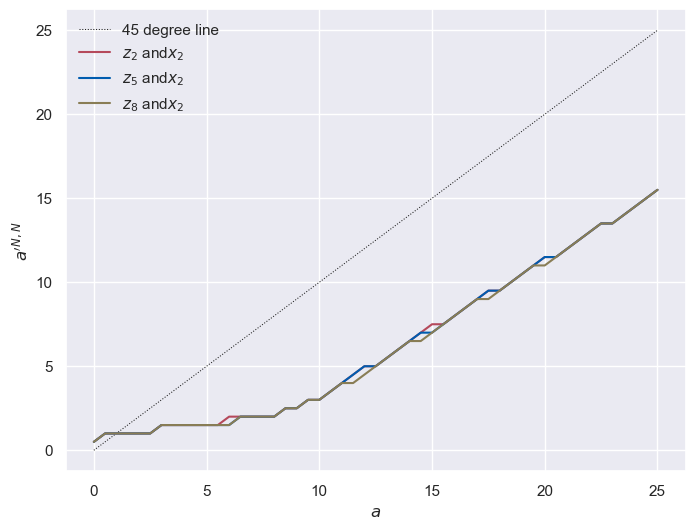

In [12]:
# Plot saving function with respect to a
ARM_Economy.plot_saving_func(type_of_household = 'H',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='ARM_saving_func_H_wrt_a.png')
ARM_Economy.plot_saving_func(type_of_household = 'NP',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='ARM_saving_func_NP_wrt_a.png')
ARM_Economy.plot_saving_func(type_of_household = 'NN',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='ARM_saving_func_NN_wrt_a.png')

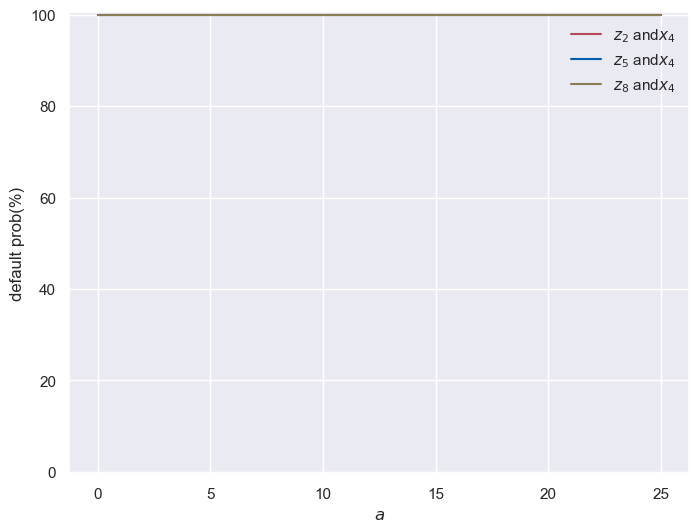

In [13]:
# Plot default probability with respect to a
ARM_Economy.plot_default_prob(axis = 0,
                              fixed_states =[(2, 4), (5, 4), (8, 4)],
                              fname ='ARM_prob_D_wrt_a.png')

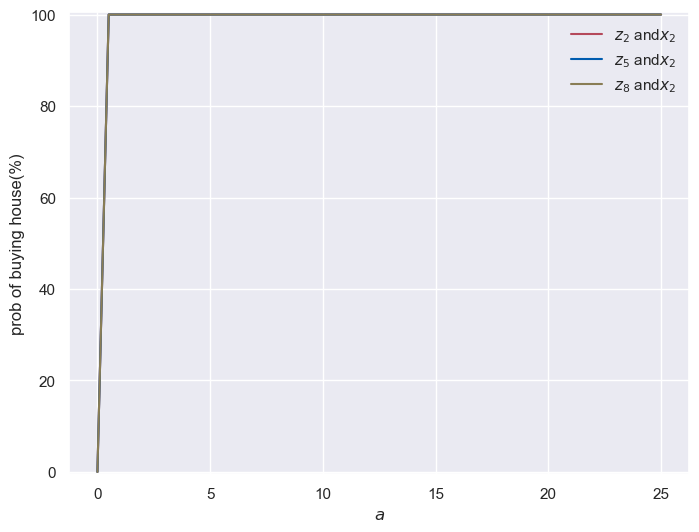

In [14]:
# Plot probability of buying house with respect to a
ARM_Economy.plot_purchase_prob(axis = 0,
                              fixed_states =[(2, 2), (5, 2), (8, 2)],
                              fname ='ARM_prob_P_wrt_a.png')

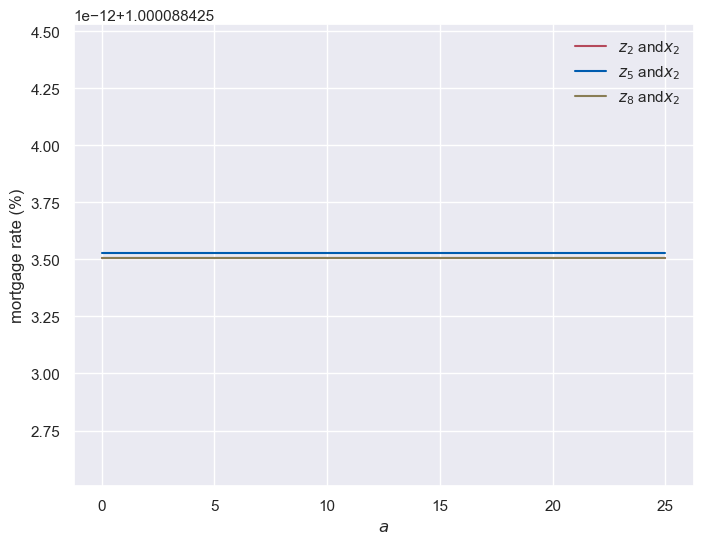

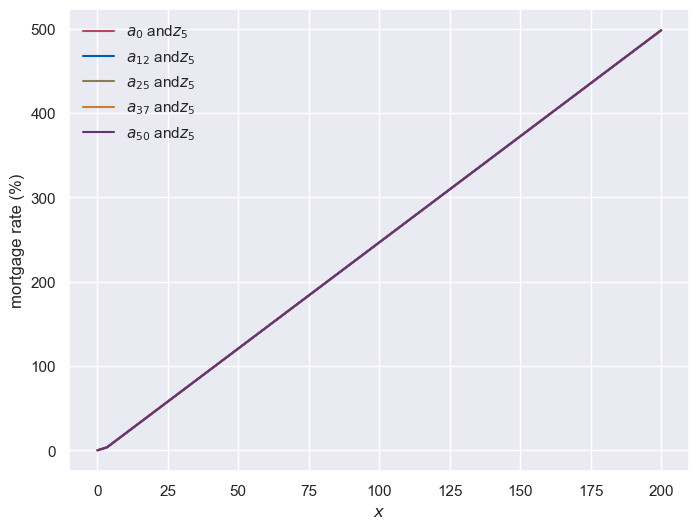

In [15]:
# Plot mortgage rate with respect to a
ARM_Economy.plot_mortgage_rate(axis = 0,
                               fixed_states =[(2, 2), (5, 2), (8, 2)],
                               fname ='ARM_mortgage_rate.png')
# Plot mortgage rate with respect to x
ARM_Economy.plot_mortgage_rate(axis = 3,
                               fixed_states =[(0, 5), (12, 5), (25, 5), (37, 5), (50, 5)],
                               fname ='ARM_mortgage_rate.png')

In [16]:
# Solve for the stationary distribution (under x = 1)
ARM_Economy.get_stationary_dist()

Starting to calculate the stationary distribution (under x = 1)...
elapsed time = 0:00:00.025689

Failed to obtain the stationary distribution. Try again with more max_iter.


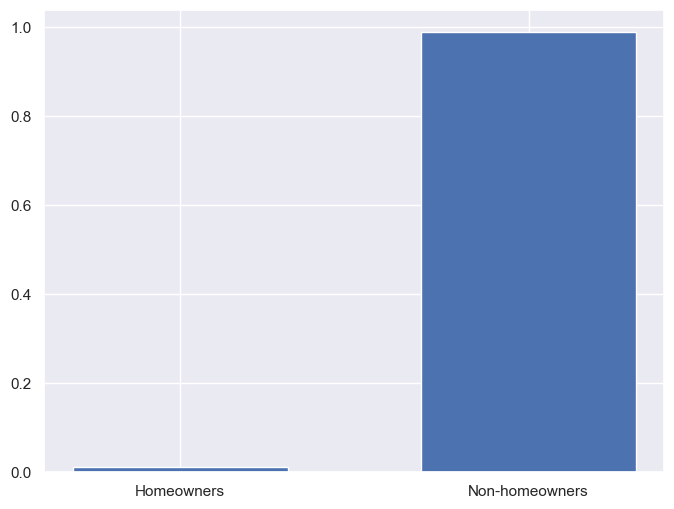

In [17]:
ARM_Economy.plot_homeownership(fname = 'ARM_homeownership.png')

In [18]:
sum(sum(ARM_Economy.density_H))

0.009968772233329882

## Step 3. Solve the (partially) fixed-rate model

In [19]:
# Generate the instance for the (partially) fixed-rate economy
FRM_Economy = FRM_FixedHousePrice(z_grid = z_grid,
                                  x_grid = x_grid,
                                  trans_prob_z = trans_prob_z,
                                  trans_prob_x = trans_prob_x,)

In [20]:
# Run the value iteration (it may take a few mins depending on # of grid points)
FRM_Economy.value_func_iter()

Starting the value function iteration...
elapsed time = 0:00:39.667006



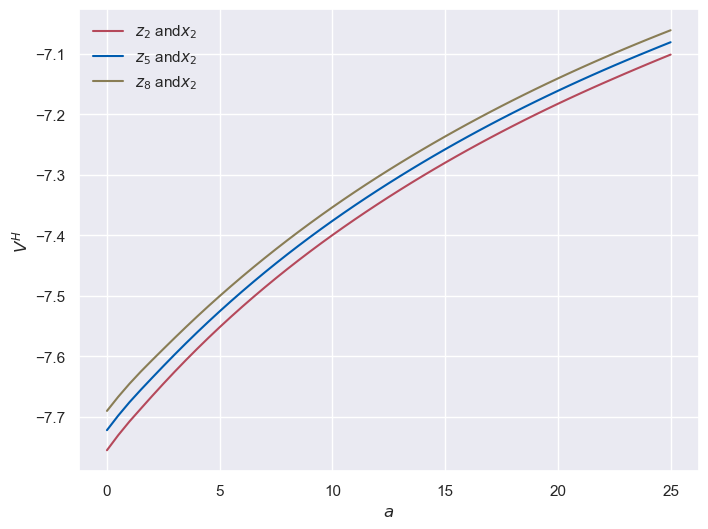

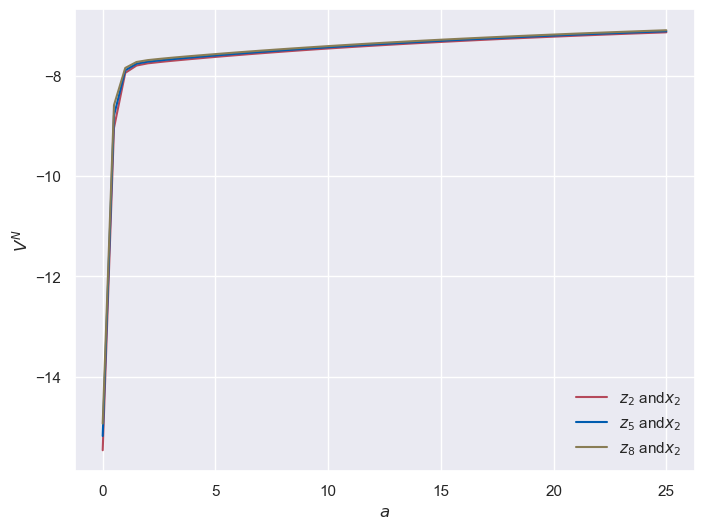

In [21]:
# Plot value function with respect to a
FRM_Economy.plot_value_func(homeownership = 'H',
                            axis = 0,
                            fixed_states =[(2, 2), (5, 2), (8, 2)],
                            fname ='FRM_value_func_homeowner_wrt_a.png')
FRM_Economy.plot_value_func(homeownership = 'N',
                            axis = 0,
                            fixed_states =[(2, 2), (5, 2), (8, 2)],
                            fname ='FRM_value_func_nonhomeowner_wrt_a.png')

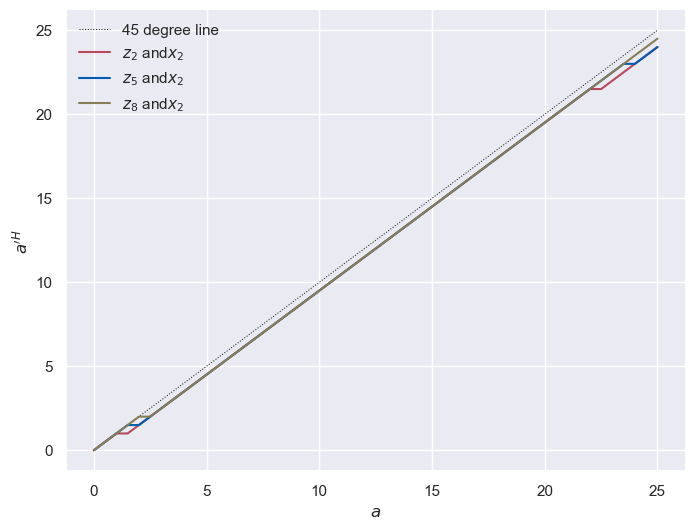

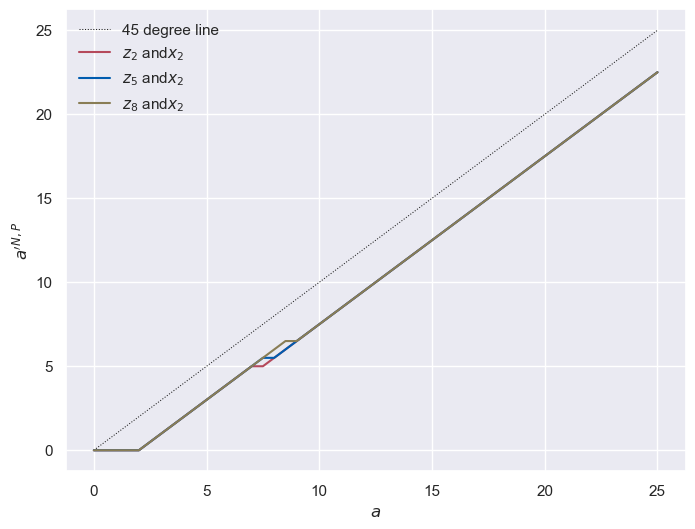

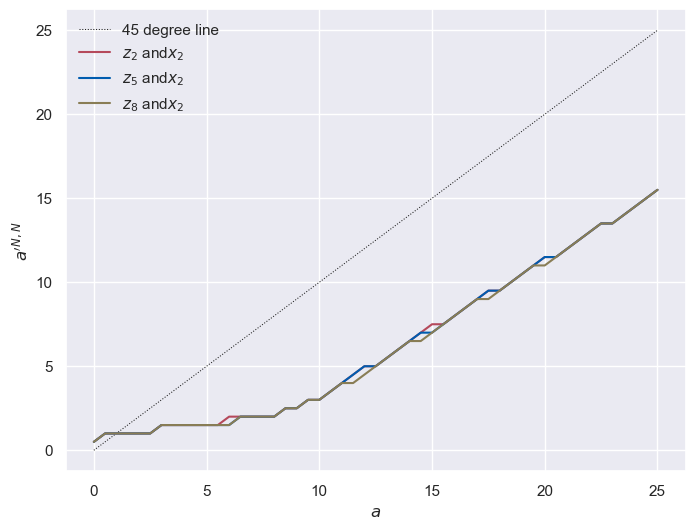

In [22]:
# Plot saving function with respect to a
FRM_Economy.plot_saving_func(type_of_household = 'H',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='FRM_saving_func_H_wrt_a.png')
FRM_Economy.plot_saving_func(type_of_household = 'NP',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='FRM_saving_func_NP_wrt_a.png')
FRM_Economy.plot_saving_func(type_of_household = 'NN',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='FRM_saving_func_NP_wrt_a.png')

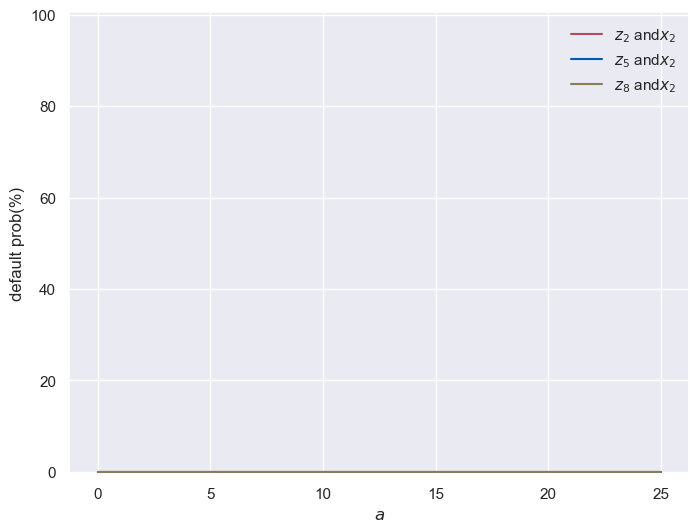

In [23]:
# Plot default probability with respect to a
FRM_Economy.plot_default_prob(axis = 0,
                              fixed_states =[(2, 2), (5, 2), (8, 2)],
                              fname ='FRM_prob_D_wrt_a.png')

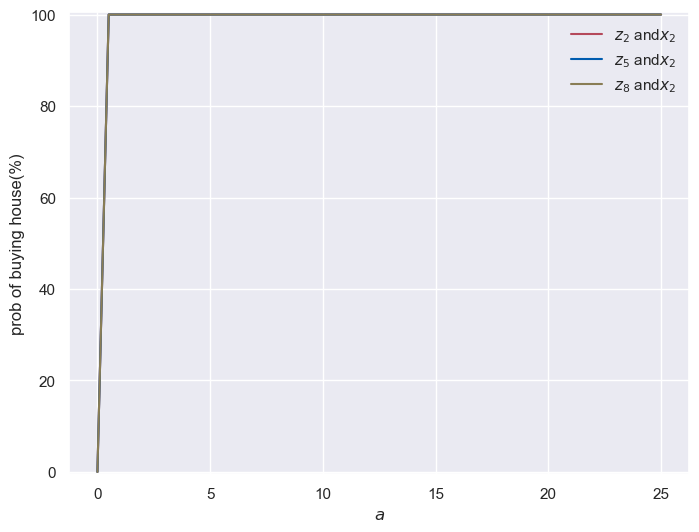

In [24]:
# Plot probability of buying house with respect to a
FRM_Economy.plot_purchase_prob(axis = 0,
                               fixed_states =[(2, 2), (5, 2), (8, 2)],
                               fname ='FRM_prob_P_wrt_a.png')

In [25]:
# Solve for the stationary distribution (under x = 1)
FRM_Economy.get_stationary_dist()

Starting to calculate the stationary distribution (under x = 1)...
elapsed time = 0:00:00.023928

Failed to obtain the stationary distribution. Try again with more max_iter.


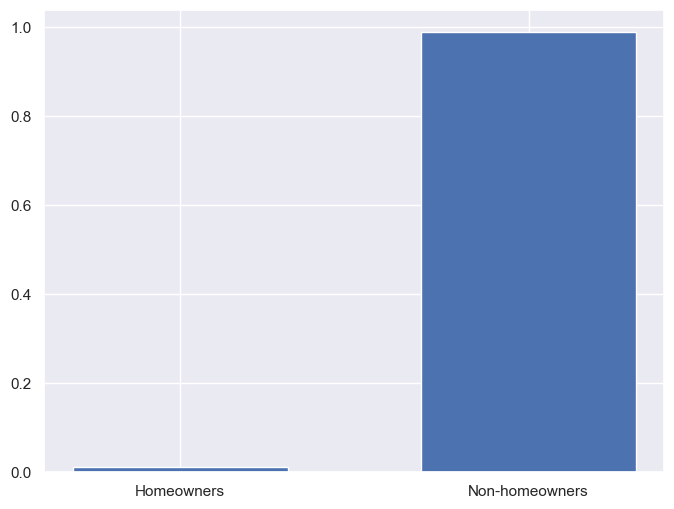

In [26]:
FRM_Economy.plot_homeownership(fname = 'FRM_homeownership.png')